# Beaker: Using RDKit without RDKit

### myChEMBL team, ChEMBL group, EMBL-EBI.

There are cases when one would need to use a chemoinformatics toolkit without having to install it. Such cases include a computer without sufficient privileges, a JavaScript web widget or mobile phone application. Another, very pragmatic, reason could be simply the lack of technical knowledge or experience to install such a toolkit or the need to quickly check some chemical properties without spending too much time on installation.

In such cases, our tool called [Beaker](https://github.com/mnowotka/chembl_beaker) can be very helpful. To the less advanced users, Beaker can be seen as a part of public [web services](https://www.ebi.ac.uk/chembl/ws), provided by ChEMBL. In the same way, one can use ChEMBL web services to check details of a compound for the given ID, now one may call the same web services to convert molfiles to SMILES, depict them, calculate fingerprints, etc.

The only requirement to use this functionality is having an internet connection. If you have myChEMBL VM, working internet connection is not required - web services are preloaded on the machine. This means you can use it straight away and the rest of this notebook shows how to do it in Python.

In order to access web services from Python we will use official ChEMBL python client called "chembl_webresource_client".

# Configuration

In [1]:
# First of all we have to import some useful libraries:

# json for converting python dicts to json objects back and forth
import json

# lxml.etree for pretty-printing XML documents
from lxml import etree

# Ipython helper for displaying images
from IPython.display import Image, display
from IPython.display import SVG
from IPython.display import Javascript

# By default our Python client will use public instance of web services, requiring internet connection.
# We want to use a local instance provided with myChEMBL so we are doing some additional configuration.
# You should skip this when using the client outside of myChEMBL
from chembl_webresource_client.settings import Settings
Settings.Instance().UTILS_SPORE_URL = 'http://localhost/utils/spore'

# Finally, importing utils (aka Beaker) part of ChEMBL webservices, and we are ready to go!
import chembl_webresource_client.utils as utils_mod
utils = utils_mod.utils
print dir(utils)


['MMFFctab23D', 'MMFFsmiles23D', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'addHs', 'atomIsInRing', 'atomRings', 'bondIsInRing', 'bondRings', 'breakBonds', 'call_spore_function', 'canonicalizeSmiles', 'cipStereoInfo', 'clean', 'ctab23D', 'ctab2image', 'ctab2inchi', 'ctab2inchiKey', 'ctab2json', 'ctab2smiles', 'ctab2svg', 'description', 'descriptors', 'getNumAtoms', 'getNumBonds', 'hydrogenize', 'image2ctab', 'image2smiles', 'inchi2ctab', 'inchi2inchiKey', 'inchi2svg', 'kekulize', 'logP', 'mcs', 'molExport', 'molWt', 'neutralise', 'numAtomRings', 'numBondRings', 'numRings', 'official', 'removeHs', 'rules', 'sanitize', 'sdf2SimilarityMap', 'sdf2fps', 'session', 'smiles23D', 'smiles2SimilarityMap', 'smiles2ctab', 'smiles2image', 'smiles2inchi', 'smiles2inchiKey', 'smiles2json', 'smi

# Format conversion

In [2]:
# We will start with converting SMILES to molfile

# Lets take SMILES of aspirin:
smiles = 'O=C(Oc1ccccc1C(=O)O)C'

# And this is how we do the conversion, simple!
ctab = utils.smiles2ctab(smiles)

# And here we can see the result:
print ctab


     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
   -3.0122    1.1850    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6987   -0.2818    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2716   -0.7438    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1580    0.2612    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4715    1.7281    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6420    2.7330    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0691    2.2711    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3827    0.8043    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2691   -0.2007    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5826   -1.6676    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0097   -2.1295    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.4690   -2.6725    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8123   -1.2868    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0

In [3]:
# OK, now having our molfile (ctab), let's convert is back to SMILES
# By default, computed SMILES will be canonical:
smi_file = utils.ctab2smiles(ctab)
print smi_file
# The result is a *.smi file with the header so in order to get only SMILES, we have to extract the relevant part:
canonical_smiles = smi_file.split()[2]
print canonical_smiles

SMILES Name 
CC(=O)Oc1ccccc1C(=O)O 0

CC(=O)Oc1ccccc1C(=O)O


In [4]:
# Having our aspirin molfile (ctab), we can compute InCHI:
inchi = utils.ctab2inchi(ctab)
print inchi

InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)


In [5]:
# And, of course, an InCHIKey from InCHI:
inchiKey = utils.inchi2inchiKey(inchi)
print inchiKey

BSYNRYMUTXBXSQ-UHFFFAOYSA-N


In [6]:
# It's also possible to convert InCHI back to molfile (ctab2):
ctab2 = utils.inchi2ctab(inchi)

# And a molfile to smiles:
smiles2 = utils.ctab2smiles(ctab2).split()[2]

# Let's check if we've go the same canonical SMILES after this round trip:
canonical_smiles == smiles2

True

# Marvin utils

[Marvin 4 JS](https://www.chemaxon.com/products/marvin/marvin-js/) is a JavaScript port of very popular compound editor. To provide some extended functionality, such as importing/exporting from different formats, providing stereochemistry information or performing other calculations, Marvin 4 JS is using web services. The [specification](https://marvinjs-demo.chemaxon.com/latest/docs/dev/webservices.html) is open so everyone can provide own version of web services compatible with Marvin. Beaker provides set of methods conforming to that specification.

In [7]:
# Again, let's start from the SMILES for Aspirin
smiles = 'O=C(Oc1ccccc1C(=O)O)C'

# We will convert it to *.mrv format
mrv = json.loads(utils.molExport(structure=smiles, parameters="mrv"))['structure']

# Since *.mrv files are XML-based we can pretty-print it:
root = etree.fromstring(mrv).getroottree()
print etree.tostring(root, pretty_print=True)

<cml>
  <MDocument>
    <MChemicalStruct>
      <molecule molID="m1">
        <atomArray>
          <atom elementType="O" id="a1" x2="-2.99879997601" y2="1.1797333239"/>
          <atom elementType="C" id="a2" x2="-2.68669331184" y2="-0.280559997756"/>
          <atom elementType="O" id="a3" x2="-1.26597332321" y2="-0.740506660743"/>
          <atom elementType="C" id="a4" x2="-0.157359998741" y2="0.260026664586"/>
          <atom elementType="C" id="a5" x2="-0.469466662911" y2="1.72031998624"/>
          <atom elementType="C" id="a6" x2="0.639146661553" y2="2.72085331157"/>
          <atom elementType="C" id="a7" x2="2.05986665019" y2="2.26109331524"/>
          <atom elementType="C" id="a8" x2="2.37215998102" y2="0.800613326928"/>
          <atom elementType="C" id="a9" x2="1.26354665656" y2="-0.199733331735"/>
          <atom elementType="C" id="a10" x2="1.57565332073" y2="-1.66021332005"/>
          <atom elementType="O" id="a11" x2="2.99637330936" y2="-2.11997331637"/>
          <

In [8]:
# OK, now let's do the opposite. Starting with some mrv (cml) file, let's compute a stereo information:
cml = '''<cml>
             <MDocument>
                 <MChemicalStruct>
                     <molecule molID="m1">
                         <atomArray>
                             <atom id="a1" elementType="C" x2="-3.1249866416667733" y2="-0.5015733293207466"/>
                             <atom id="a2" elementType="C" x2="-4.458533297665067" y2="-1.2715733231607467"/>
                             <atom id="a3" elementType="C" x2="-4.458533297665067" y2="-2.81175997750592"/>
                             <atom id="a4" elementType="C" x2="-3.1249866416667733" y2="-3.58175997134592"/>
                             <atom id="a5" elementType="C" x2="-1.7912533190033066" y2="-2.81175997750592"/>
                             <atom id="a6" elementType="C" x2="-1.7912533190033066" y2="-1.2715733231607467"/>
                             <atom id="a7" elementType="C" x2="-0.45751999633984003" y2="-0.5013866626555733"/>
                             <atom id="a8" elementType="O" x2="-0.45751999633984003" y2="1.0384266583592534"/>
                             <atom id="a9" elementType="C" x2="0.87583999299328" y2="-1.2713866564955734"/>
                             <atom id="a10" elementType="C" x2="0.87583999299328" y2="-2.8113866441755735"/>
                         </atomArray>
                         <bondArray>
                             <bond atomRefs2="a1 a2" order="2"/>
                             <bond atomRefs2="a2 a3" order="1"/>
                             <bond atomRefs2="a3 a4" order="2"/>
                             <bond atomRefs2="a4 a5" order="1"/>
                             <bond atomRefs2="a5 a6" order="2"/>
                             <bond atomRefs2="a6 a1" order="1"/>
                             <bond atomRefs2="a6 a7" order="1"/>
                             <bond atomRefs2="a7 a9" order="1"/>
                             <bond atomRefs2="a9 a10" order="1"/>
                             <bond atomRefs2="a7 a8" order="1">
                                 <bondStereo>W</bondStereo>
                             </bond>
                         </bondArray>
                     </molecule>
                 </MChemicalStruct>
             </MDocument>
         </cml>
'''

# According to Marvin 4 JS WS specification, the result has to be json:
stereo_info = json.loads(utils.cipStereoInfo(structure=cml))
print stereo_info

{u'headers': {u'tetraHedral': {u'source': u'CALCULATOR', u'type': u'COMPLEX', u'name': u'tetraHedral'}, u'doubleBond': {u'source': u'CALCULATOR', u'type': u'COMPLEX', u'name': u'doubleBond'}}, u'tetraHedral': [{u'atomIndex': 6, u'chirality': u'S'}], u'doubleBond': []}


# Standardisation

[Standardiser](https://github.com/flatkinson/standardiser) is a tool written by Francis Atkinson, designed to provide a simple way of standardising molecules as a prelude to e.g. molecular modelling exercises. Thanks to Beaker, we don't have to install standardiser to use it.

O=C([O-])c1ccccc1.[Na+]


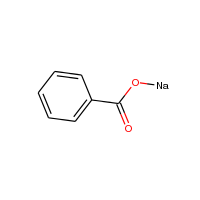

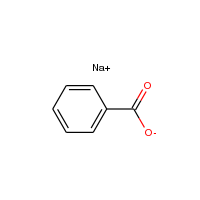

[None, None]

In [9]:
# First method provided by standardiser is to break bonds to Group I and II metal atoms:
# Before using it, we have to convert our input SMILES string to ctab:
mol = utils.smiles2ctab("[Na]OC(=O)c1ccccc1")

# Now we can apply the function
br = utils.breakBonds(mol)

# In order to get our result back in SMILES format we have to make a conversion:
smiles = utils.ctab2smiles(br).split()[2]

# And here is the result:
print smiles

# We can even use Beaker to render input and output:
[display(Image(utils.smiles2image("[Na]OC(=O)c1ccccc1"))), display(Image(utils.smiles2image("[Na+].O=C([O-])c1ccccc1")))]

NCC(Cc1nn[nH]n1)(C[N+](=O)[O-])C(=O)O


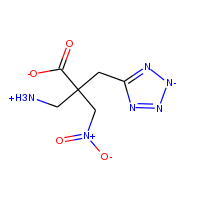

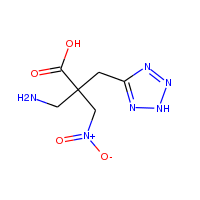

[None, None]

In [10]:
# The second method neutralizes charges by adding/removing protons
# Again, we have to convert SMILES to ctab first, then apply the method and convert result back to SMILES:
mol = utils.smiles2ctab("C(C(=O)[O-])(Cc1n[n-]nn1)(C[NH3+])(C[N+](=O)[O-])")
ne = utils.neutralise(mol)
smiles = utils.ctab2smiles(ne).split()[2]

# Now we can print the result
print smiles

# And render input and output
[display(Image(utils.smiles2image("C(C(=O)[O-])(Cc1n[n-]nn1)(C[NH3+])(C[N+](=O)[O-])"))), display(Image(utils.smiles2image("NCC(Cc1nn[nH]n1)(C[N+](=O)[O-])C(=O)O")))]

Nc1nccc2cc[nH]c(=O)c12


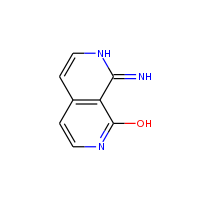

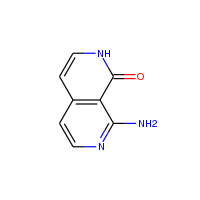

[None, None]

In [11]:
# Third method applies many structure-normalisation transformations

# Invoking it in standard way
mol = utils.smiles2ctab("Oc1nccc2cc[nH]c(=N)c12")
ru = utils.rules(mol)
smiles = utils.ctab2smiles(ru).split()[2]

# Printing the results:
print smiles

# Rendering input and output:
[display(Image(utils.smiles2image("Oc1nccc2cc[nH]c(=N)c12"))), display(Image(utils.smiles2image("Nc1nccc2cc[nH]c(=O)c12")))]

NCc1ccc(CC(=O)O)cc1


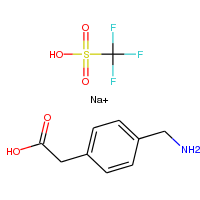

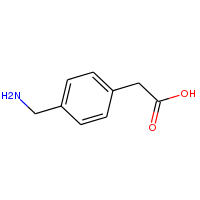

[None, None]

In [12]:
# Forth method can be used to discard any salt/solvate components

# We alredy know what to do:
mol = utils.smiles2ctab("[Na+].OC(=O)Cc1ccc(CN)cc1.OS(=O)(=O)C(F)(F)F")
un = utils.unsalt(mol)
smiles = utils.ctab2smiles(un).split()[2]

# printing results:
print smiles

# rendering input and output:
[display(Image(utils.smiles2image("[Na+].OC(=O)Cc1ccc(CN)cc1.OS(=O)(=O)C(F)(F)F"))), display(Image(utils.smiles2image("NCc1ccc(CC(=O)O)cc1")))]

NCc1ccc(CC(=O)O)cc1


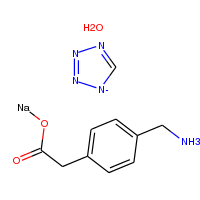

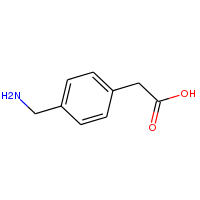

[None, None]

In [13]:
# The last method from the Standardiser package aggregates four previous into one:
mol = utils.smiles2ctab("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.O")
st = utils.standardise(mol)
smiles = utils.ctab2smiles(st).split()[2]
print smiles
[display(Image(utils.smiles2image("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.O"))), display(Image(utils.smiles2image("NCc1ccc(CC(=O)O)cc1")))]

# Descriptors calculation

In [14]:
# We will now calculate a number of chemical descriptors

# As prevously we will start with aspirin SMILES:
aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')

# First descriptor will e the number of heavy atoms:
num_atoms = json.loads(utils.getNumAtoms(aspirin))[0]
print "num atoms = %s" % num_atoms

# Molecular weight:
mol_wt = json.loads(utils.molWt(aspirin))[0]
print "mol_wt = %s" % mol_wt

# Log_p:
log_p = json.loads(utils.logP(aspirin))[0]
print "log_p = %s" % log_p

# TPSA:
tpsa = json.loads(utils.tpsa(aspirin))[0]
print "tpsa = %s" % tpsa

# Or we can just calculate all those descriptors (and more!) at once: 
descriptors = json.loads(utils.descriptors(aspirin))[0]
print descriptors

num atoms = 13
mol_wt = 180.159
log_p = 1.3101
tpsa = 63.6
{u'MaxEStateIndex': 10.611948223733938, u'Chi4v': 0.8871712192374142, u'Kappa3': 2.297415032519928, u'Chi4n': 0.8871712192374142, u'SMR_VSA10': 11.938610575903699, u'MinAbsPartialCharge': 0.33900378687731025, u'MinPartialCharge': -0.4775395271554559, u'SlogP_VSA6': 24.26546827384644, u'ExactMolWt': 180.042258736, u'MolWt': 180.15899999999996, u'NumAromaticRings': 1, u'NumSaturatedHeterocycles': 0, u'NumAliphaticHeterocycles': 0, u'VSA_EState10': 0.0, u'TPSA': 63.60000000000001, u'PEOE_VSA14': 11.938610575903699, u'PEOE_VSA13': 0.0, u'PEOE_VSA12': 0.0, u'PEOE_VSA11': 0.0, u'PEOE_VSA10': 11.3129633249809, u'BalabanJ': 3.0435273546341013, u'Chi0n': 6.981359543650051, u'EState_VSA10': 9.589074368143644, u'EState_VSA11': 0.0, u'HeavyAtomMolWt': 172.09499999999997, u'Chi0': 9.844934982691242, u'Chi1': 6.109060905280622, u'NumAliphaticRings': 0, u'MolLogP': 1.3100999999999998, u'NumAliphaticCarbocycles': 0, u'NumValenceElectrons': 68.

# Fingerprints

In [15]:
# As well as descriptor we can compute fingerprints.
# The output will be an FPS format. You can use optional "type" argument to choose type of fingerprints.
# This can be "morgan", "pair" or "maccs". Default is "morgan".

aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
fingerprints = utils.sdf2fps(aspirin)
print fingerprints

#FPS1
#num_bits=2048
#software=RDKit/2015.03.1
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000020000000000000000001000000000000000000000000000000000000000000000004000000008000000000000000000000000000800000000000000000000000002000000000000000000000000000020008800002000000010000000000000000000000008000000000000000000000000000000000000000000000100000000400000080000010000000000000000000000000000000000000010000000000000000000000000002004000008000000000000000000000000002000000002000000000000004008000000000000000	BSYNRYMUTXBXSQ-UHFFFAOYSA-N



# Compound Images

In [16]:
# In addition to compute compound images in raster format (png), Beaker supports vector formats as well.
# We will first introduce JSON-based format. You can for example use `smiles2json` method to generate json object
# describing the visual representation. In order to render it, you can use raphael.js library and it's 
# `paper.add` method:

aspirin = 'O=C(Oc1ccccc1C(=O)O)C'
print utils.smiles2json(aspirin)
code = """
window.define = undefined;
$.getScript('https://cdnjs.cloudflare.com/ajax/libs/raphael/2.1.0/raphael-min.js', function(){
    var target = $(':focus').parent('div');
    var paper = Raphael(target, 320, 200);
    paper.add(%s);
    $(paper.canvas).delay( 2000 ).fadeOut( 400 );
});
"""
Javascript(code % utils.smiles2json(aspirin))

[{"path": "M0,0L200,0L200,200L0,200Z", "type": "path", "fill": "rgb(255, 255, 255)"}, {"height": 10.554066799834093, "width": 10.554066799834093, "stroke": "rgb(255, 255, 255)", "y": 67.30090812747672, "x": 32.7215256071902, "type": "rect", "fill": "rgb(255, 255, 255)"}, {"font-size": 10.554066799834093, "text": "O", "stroke": "rgb(255, 0, 0)", "y": 72.57794152739376, "x": 37.99855900710725, "type": "text"}, {"height": 10.554066799834093, "width": 10.554066799834093, "stroke": "rgb(255, 255, 255)", "y": 113.10291896469946, "x": 74.05581960245203, "type": "rect", "fill": "rgb(255, 255, 255)"}, {"font-size": 10.554066799834093, "text": "O", "stroke": "rgb(255, 0, 0)", "y": 118.3799523646165, "x": 79.33285300236908, "type": "text"}, {"height": 10.554066799834093, "width": 10.554066799834093, "stroke": "rgb(255, 255, 255)", "y": 146.00938941490907, "x": 181.0, "type": "rect", "fill": "rgb(255, 255, 255)"}, {"font-size": 10.554066799834093, "text": "O", "stroke": "rgb(255, 0, 0)", "y": 151.

<IPython.core.display.Javascript object>

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="200pt" height="200pt" viewBox="0 0 200 200" version="1.1">
<g id="surface77">
<rect x="0" y="0" width="200" height="200" style="fill:rgb(100%,100%,100%);fill-opacity:1;stroke:none;"/>
<path style="fill:none;stroke-width:1.2;stroke-linecap:butt;stroke-linejoin:miter;stroke:rgb(0%,0%,0%);stroke-opacity:1;stroke-miterlimit:10;" d="M 127 100 L 113.5 123.382812 "/>
<path style="fill:none;stroke-width:1.2;stroke-linecap:butt;stroke-linejoin:miter;stroke:rgb(0%,0%,0%);stroke-opacity:1;stroke-miterlimit:10;" d="M 122.1875 100.339844 L 111.386719 119.042969 "/>
<path style="fill:none;stroke-width:1.2;stroke-linecap:butt;stroke-linejoin:miter;stroke:rgb(0%,0%,0%);stroke-opacity:1;stroke-miterlimit:10;" d="M 113.5 123.382812 L 86.5 123.382812 "/>
<path style="fill:none;stroke-width:1.2;stroke-linecap:butt;stroke-linejoin:miter;stroke:rgb(0%,0%,0%);stroke-opacity:1;stroke-miterlimit:10;" d="M 86.5 123.382812 

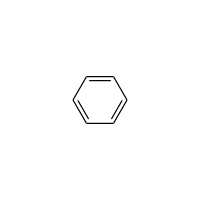

In [17]:

# Most popular vector graphics format is XML-based SVG, this is how we can render compound as a SVG image:
benzene = 'c1ccccc1'
svg = utils.smiles2svg(benzene)

# pretty-printing SVG input, just to prove this is a vector graphic:
root = etree.fromstring(svg).getroottree()
print etree.tostring(root, pretty_print=True)

# And finally displaying it:
SVG(svg)

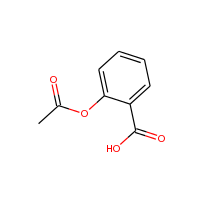

In [18]:
# And finally our old friends - raster images:
aspirin = 'O=C(Oc1ccccc1C(=O)O)C'
img = utils.smiles2image(aspirin)
Image(img)

# Maximum Common Substructure

In [19]:
# This is how to find a maximum common substructure (MCS) of three molecules:
smiles = ["O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C", "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC", "c1(C=O)cc(OC)c(O)cc1"]

# converting out molecules SMILES to molfiles:
mols = [utils.smiles2ctab(smile) for smile in smiles]

# joining molfiles to create a SDF file:
sdf = ''.join(mols)

# and finally computing MCS
result = utils.mcs(sdf)

# and displaying results:
print result

[#6]:1(:[#6]:[#6](:[#6](:[#6]:[#6]:1)-[#8])-[#8]-[#6])-[#6]


# Compouting 3D coordinates

In [20]:
# It's very easy to compute a molfile with 3D coordinates:
aspirin = 'O=C(Oc1ccccc1C(=O)O)C'
mol_3D = utils.smiles23D(aspirin)
print mol_3D


     RDKit          3D

 21 21  0  0  0  0  0  0  0  0999 V2000
    2.4376    0.6881   -1.4041 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.3845   -0.1969   -0.5077 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1672   -0.5490    0.0891 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0101    0.2162    0.0456 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0378    1.6234    0.0045 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1394    2.3726   -0.0087 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3762    1.7311    0.0254 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4414    0.3379    0.0831 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2652   -0.4345    0.1029 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3587   -1.9150    0.1530 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4684   -2.6234   -0.3874 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4224   -2.5526    0.7899 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.6147   -0.9634   -0.1596 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9839    2.1470    0

# Optical Structure Recognition - convering image to structure

[OSRA](http://cactus.nci.nih.gov/osra/) is an open source tool performing Optical Structure Recognition - it can be used to convert an image, containing one or more compounds to it's structures in *smi or *mol format. Beaker uses OSRA to implement "image2ctab" method.

In [27]:
# Traditionally, let's start with aspirin SMILES:
aspirin = 'CC(C)Oc1ccccc1C(=O)O'

# Let's convert it to image:
im = utils.smiles2image(aspirin)

# And use OSRA to convert image to molfile:
mol = utils.image2ctab(im)

# We can now convert molfile to SMILES:
smiles = utils.ctab2smiles(mol).split()[2]

# And check if we get the same SMILES string:
smiles == aspirin

True

# Kekulisation

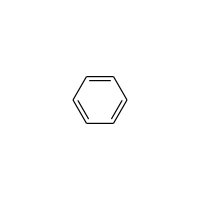

In [22]:
# Last piece of Beaker functionality is kekulisation:

# This time we will start with molfile:
aromatic='''
  Mrv0541 08191414212D

  6  6  0  0  0  0            999 V2000
   -1.7679    1.5616    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4823    1.1491    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4823    0.3241    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7679   -0.0884    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0534    0.3241    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0534    1.1491    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  4  0  0  0  0
  1  6  4  0  0  0  0
  2  3  4  0  0  0  0
  3  4  4  0  0  0  0
  4  5  4  0  0  0  0
  5  6  4  0  0  0  0
M  END

'''

# Kekulising is trivial:
kek = utils.kekulize(aromatic)

# Rendering the result
Image(utils.ctab2image(kek))